# Auswertung - Verteilung der Daten

In diesem ersten Abschnitt soll die Verteilung, der bei der Evaluierung vom 12.6 - 14.6 erhobenen Daten, festgestellt werden. Dabei ist einersteits interessant wie viele Datenpunkte pro Person, Area of Interest (AOI) bzw. pro Position erhoben wurden. Dieses erste Teil der Auswertung soll daher einen ersten Überblick über die erobenen Daten gewähren und zusätzlich Indiezien darüber liefern, welche erste Limitationen für das, der Evaluation zu grundelegende, System erkannt werden können.

### Auswertungs-Fragen:
* [Frage 1: Gesamtzahl der gesammelten Daten](#cell1)
* [Frage 2: Verhältnis von “Erkannt” und “Nicht-Erkannt”](#cell2)
* [Frage 3: Verteilung der Hits auf die einzelnen AOIs](#cell3)
* [Frage 4: Verteilung der Hits auf die einzelnen Positionen](#cell4)
* [Frage 5: Verteilung der Hits auf die AOIs pro Position](#cell5)
* [Frage 6: Verteilung der Hits auf die Clients](#cell6)

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
import numpy as np
from scipy import stats
import math

from datetime import datetime

In [3]:
root = '../0_annotation'
file_names = []

for subdir, dirs, files in os.walk(root):
    for file in files:
        if 'annotation' not in file or '.csv' not in file:
            continue
        file_names.append(os.path.join(subdir, file).replace('\\', '/'))

<a id="cell1"></a>
# Frage 1: Gesamtzahl der gesammelten Daten

**Ziel:** Ersten Überblick über die Daten. Was ist die absoulte Zahl an erkannten Blicken pro Nutzer. Welche Nutzer haben besonders viele Blicke, welche extrem wenig.

In [4]:
info_titles = [
    'Frames',
    'Zeitpunkt',
    'Test Person',
    'Frames mit Gesicht',
    'Frames mit Blick',
    'Dateipfad'
]

# Important vars for further analysis

info_data = []
counter_gaze = []
frames_with_face = []
testers = []
aoi_hits = []
position_hits = {}
positions_by_aoi_hits = []
client_data = {}

for f in file_names:
    df = pd.read_csv(f, sep=',', engine='python')
    
    # meta data
    count_total = len(df['frame'])
    last_ts = datetime.fromtimestamp(df['server_timestamp'][count_total - 1])
    test_person = str((df['annotation_test_person_id'][count_total - 1]))[:-1]
       
    
    # gaze & face hits
    count_face = len(df[(df[['eye_lmk_X_0','eye_lmk_Y_0','eye_lmk_Z_0']] != 0).all(axis=1)]['frame'])
    count_gaze = len(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['frame'])
    
    # aoi & positions hits
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['annotation_aoi'],
                                         return_counts=True)
                 
    current_aois = pd.DataFrame(occurCount, index =uniqueValues, columns=["tester_" + test_person]) 
    
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['annotation_pos'],
                                         return_counts=True)
    current_positions = occurCount
    
    # aoi vs. positions hits
    tempFrame = df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]
    result_pos_aoi = tempFrame.groupby(['annotation_pos','annotation_aoi']).size().reset_index().rename(columns={0:"tester_" + test_person})
        
    #client
    uniqueValues, occurCount = np.unique(df[(df[['gaze_direction_0_x','gaze_direction_0_y','gaze_direction_0_z']] != 0).all(axis=1)]['client_id'],
                                         return_counts=True)
    client_hits = occurCount
    
    # extract data separately
    info_data.append([count_total, last_ts, test_person, count_face, count_gaze, f])
    counter_gaze.append(count_gaze)
    frames_with_face.append(count_face)    
    positions_by_aoi_hits.append(result_pos_aoi)
    
    aoi_hits.append(current_aois)
    position_hits['tester_' + test_person] = current_positions
    client_data['tester_' + test_person] = client_hits
    
    testers.append(test_person)

aoi_hits = pd.concat(aoi_hits, axis=1)
pd.DataFrame(info_data, columns=info_titles)

,Frames,Zeitpunkt,Test Person,Frames mit Gesicht,Frames mit Blick,Dateipfad
0,13013,2019-06-12 09:44:18,01,13013,245,../0_annotation/01__annotation_2019_06_12_10_2...
1,16459,2019-06-12 10:04:04,02,16459,141,../0_annotation/02__annotation_2019_06_12_104...
2,16562,2019-06-12 10:26:03,03,16562,243,../0_annotation/03__annotation_2019_06_12_111...
3,13127,2019-06-12 10:45:05,04,13127,331,../0_annotation/04__annotation_2019_06_12_113...
4,12552,2019-06-12 11:02:52,05,12552,667,../0_annotation/05__annotation_2019_06_12_114...
5,14585,2019-06-12 11:20:43,06,14585,694,../0_annotation/06__annotation_2019_06_12_120...
6,14689,2019-06-12 12:16:13,07,14689,322,../0_annotation/07__annotation_2019_06_12_130...
7,14715,2019-06-12 12:41:45,08,14715,268,../0_annotation/08__annotation_2019_06_12_132...
8,13927,2019-06-12 13:11:52,09,13927,218,../0_annotation/09__annotation_2019_06_12_135...
9,12592,2019-06-12 13:32:37,10,12592,302,../0_annotation/10__annotation_2019_06_12_141...


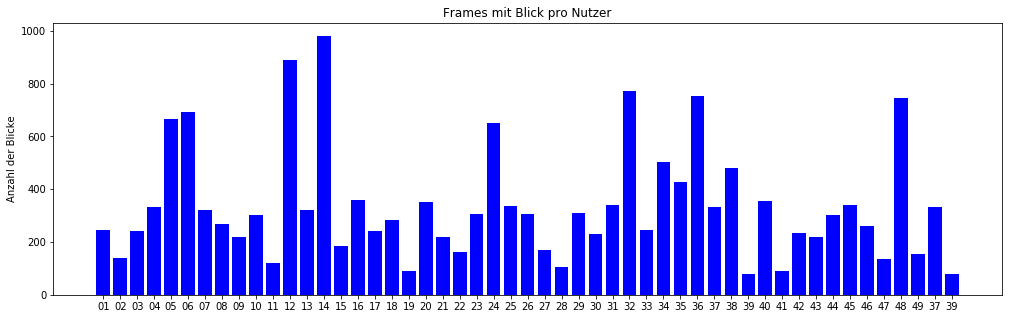

In [5]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.xticks(y_pos, testers)
plt.ylabel('Anzahl der Blicke')
plt.title('Frames mit Blick pro Nutzer')

plt.show()

**Ergebnis:** Besonders viele werden bei 12, 36, 06, 14, 32, 05, 34, 24, 48 erkannt. Fast keine bei 28, 41, 19, 11, 39, 02, 39.

<a id="cell2"></a>

# Frage 2: Verhältnis von “Erkannt” und “Nicht-Erkannt”

**Ziel:** Wie groß ist der Teil der irrelevanten Informationen (Nicht-Erkannt), im Verhältnis zu relevanten Informationen (Erkannt).

Frames mit Gesicht: 755828
Frames mit Blick: 17232
Verhältnis zwischen Gesicht (97.77%) und Blick(2.23%)


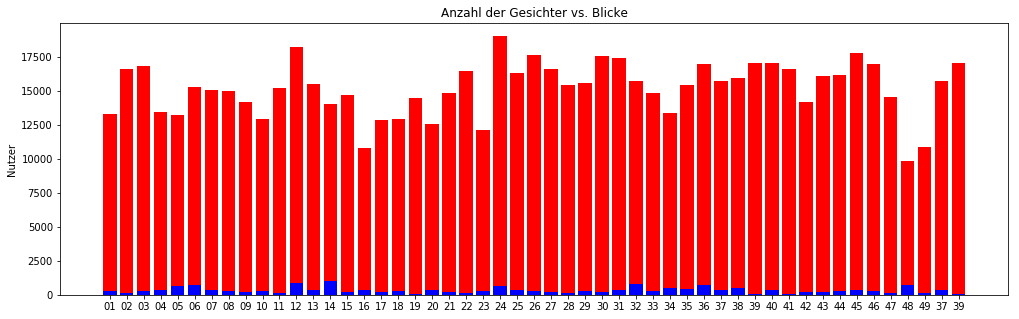

In [15]:
y_pos = np.arange(len(testers))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

plt.bar(y_pos, counter_gaze, align='center', color = 'b')
plt.bar(y_pos, frames_with_face, align='center', color = 'r', bottom = counter_gaze)
plt.xticks(y_pos, testers)
plt.ylabel('Nutzer')
plt.title('Anzahl der Gesichter vs. Blicke')

sum_face = np.sum(frames_with_face)
sum_gaze = np.sum(counter_gaze)

percent_face = str(round(sum_face / ((sum_face + sum_gaze)/100), 2))
percent_gaze = str(round(sum_gaze / ((sum_face + sum_gaze)/100), 2))


print("Frames mit Gesicht: " + str(sum_face))
print("Frames mit Blick: " + str(sum_gaze))
print("Verhältnis zwischen Gesicht (" + percent_face + "%) und Blick(" + percent_gaze + "%)")

plt.show()

**Ergebnis:** Verhältnis zwischen “Nicht-Erkannt” (97.77%) und Erkannt”(2.23%). Liegt einerseits daran, dass Clients bevor das erste mal ein Gesicht erkannt wird, 
mit einer Framerate von 24 fps laufen, dadurch werden viel mehr "Nicht-Erkannt" erzeugt. Zudem steht der Tester nicht permanent vor allen Cams. Würde man das auf Clientseite
schon rausfiltern, könnte 97,77% des Netzwerktraffics reduziert werden.

<a id="cell3"></a>
# Frage 3: Verteilung der Hits auf die einzelnen AOIs 

**Ziel:** WAS IST DAS ZIEL.

## Verteilung der Hits auf AOIs - gesamt

**Ziel:** WAS IST DAS ZIEL.

In [67]:
for key, value in aoi_hits.iteritems(): 
    statistics.append([key, np.nanmean(value.values), np.average(np.nan_to_num(value.values)), stats.mode(value.values)])
    
pd.DataFrame(statistics, columns=["tester", "avg", "mean", "mode"]).sort_values(by=['avg'])

,tester,avg,mean,mode
91,tester_41,3.791667,3.250000,"([2.0], [9])"
40,tester_41,3.791667,3.250000,"([2.0], [9])"
50,tester_39,3.850000,2.750000,"([1.0], [4])"
89,tester_39,3.850000,2.750000,"([1.0], [4])"
38,tester_39,3.850000,2.750000,"([1.0], [4])"
101,tester_39,3.850000,2.750000,"([1.0], [4])"
69,tester_19,4.000000,3.285714,"([2.0], [9])"
18,tester_19,4.000000,3.285714,"([2.0], [9])"
27,tester_28,4.160000,3.714286,"([4.0], [7])"
78,tester_28,4.160000,3.714286,"([4.0], [7])"


Text(0.5, 1.0, 'AOIs')

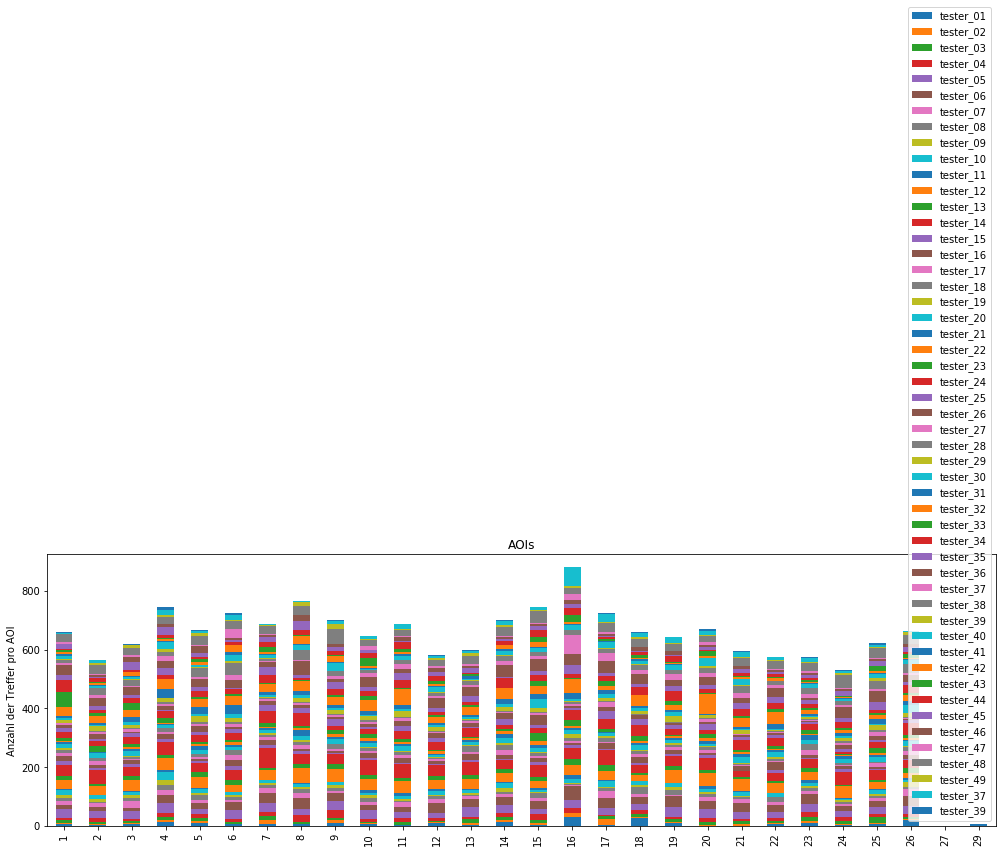

In [69]:
y_pos = np.arange(len(aoi_hits))

aoi_hits.plot(kind='bar', stacked=True)
    
plt.ylabel('Anzahl der Treffer pro AOI')
plt.title('AOIs')

**Ergebnis:** WAS IST DAS Ergebnis.

## Verteilung der Hits  auf AOIs - pro Nutzer

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'Nutzer')

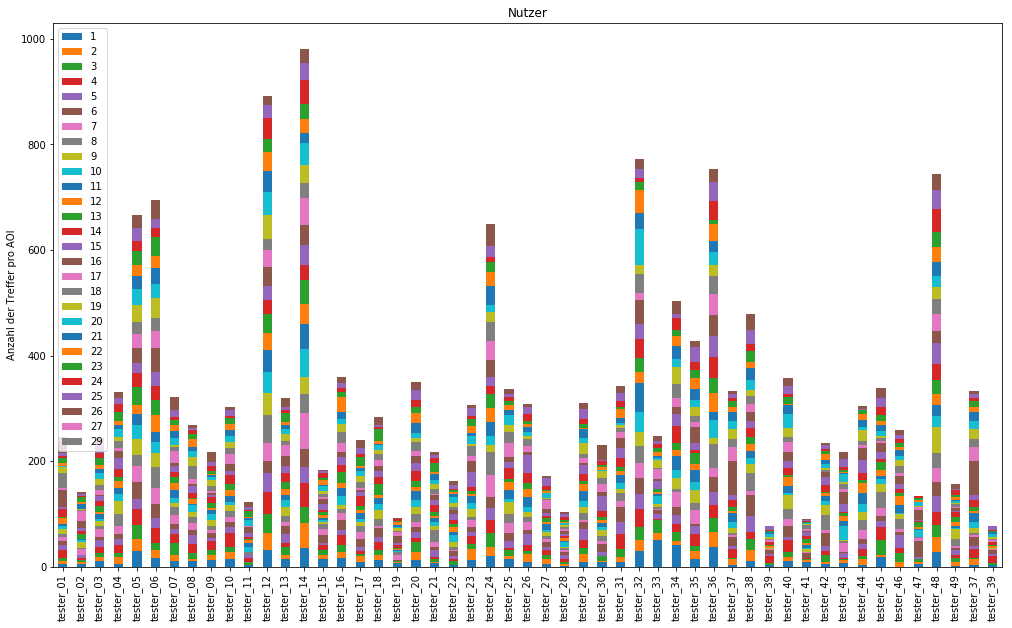

In [18]:
plt.rcParams["figure.figsize"] = (17, 10) # (w, h)

aoi_hits.transpose().plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro AOI')
plt.title('Nutzer')

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell4"></a>
# Frage 4: Verteilung der Hits auf die einzelnen Positionen

**Ziel:** WAS IST DAS ZIEL.

## Verteilung der Hits auf Positionen - gesamt

**Ziel:** Wie ist die Trefferrate pro Position. Welche Position ermöglicht viele Treffer und welche Position erhält am wenigsten Treffer.

Text(0.5, 1.0, 'AOIs')

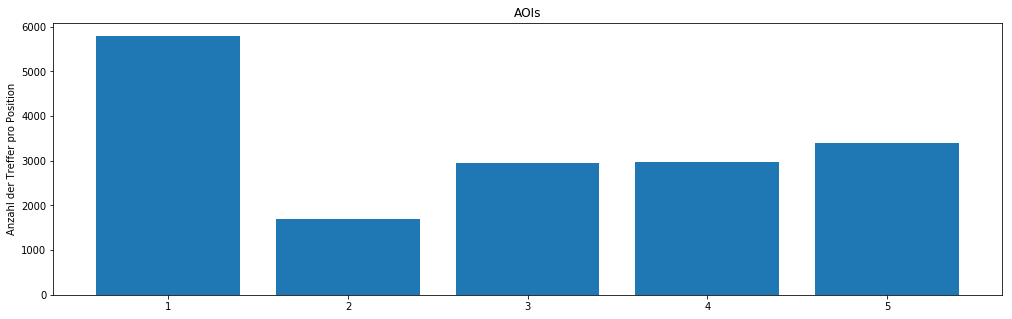

In [19]:
y_pos = np.arange(len(position_hits['tester_37']))

plt.rcParams["figure.figsize"] = (17, 5) # (w, h)
plt.bar(y_pos+1, sum(position_hits[key] for key in position_hits), align='center')

plt.ylabel('Anzahl der Treffer pro Position')
plt.title('AOIs')

**Ergebnis:** WAS IST DAS Ergebnis.

## Verteilung der Hits auf Positionen - pro Nutzer

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'Nutzer')

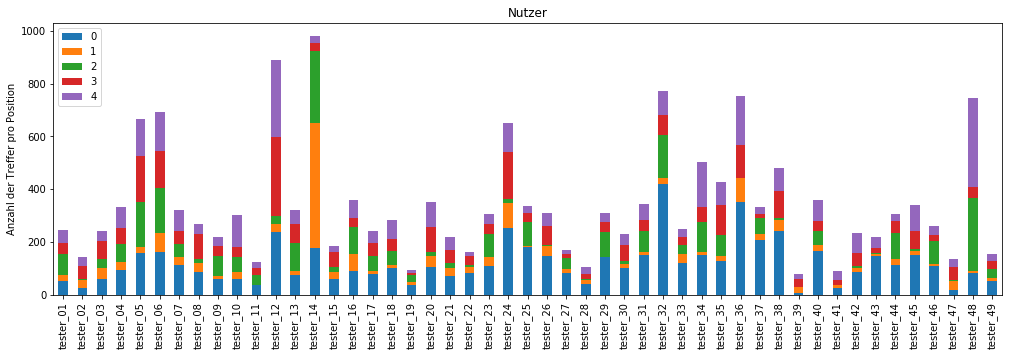

In [20]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

df=pd.DataFrame(position_hits).transpose()
df.plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro Position')
plt.title('Nutzer')

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell5"></a>
# Frage 5: Verteilung der Hits auf die AOIs pro Position

**Ziel:** WAS IST DAS ZIEL.

In [58]:
import numpy as np
import pandas as pd
import itertools
from operator import itemgetter

#ar is array of dataframes, choice1 is max value annotation_pos +1, choice2 is max value annotation_aoi +1
def pandasnumpy(ar,choice1,choice2):
    tester_names = list(  set(list(itertools.chain(*[list(_df.columns.values) for _df in ar]))).difference({'annotation_pos','annotation_aoi'}))                            
    res = pd.DataFrame()
    x = list(itertools.product(range(1,choice1), range(1,choice2)))
    res['crit'] = x
    res['annotation_pos'] =list(map(itemgetter(0), x))
    res['annotation_aoi'] =list(map(itemgetter(1), x))
    for _tester in tester_names:
        res[_tester] = np.full(res.shape[0],0)
    for _df in ar:
        _tester = [_val for _val in list(_df.columns.values) if _val != 'annotation_pos' and _val != 'annotation_aoi'][0]
        _df['crit'] = list(zip(_df['annotation_pos'], _df['annotation_aoi']))
        _res = pd.concat([res,_df])[['crit',_tester,'annotation_pos', 'annotation_aoi']]
        _res = _res.drop_duplicates(subset='crit', keep="last")
        _res = _res.sort_values(['annotation_pos', 'annotation_aoi'], ascending=[True, True]).reset_index()
        res[_tester] = _res[_tester]
    res['results_zip'] = list(zip(*[res[_tester] for _tester in tester_names]))
    zerotup = tuple(0 for i in range(0,len(tester_names)))
    res = res[res['results_zip'] != zerotup]
    rel_cols = tester_names + ['annotation_pos', 'annotation_aoi']
    res = res[rel_cols]
    return res

res = pandasnumpy(positions_by_aoi_hits,6,27)
print(res)

#plt.rcParams["figure.figsize"] = (17, 8) # (w, h)

#post_aoi_df = res.pivot(index=res['annotation_pos'], columns='annotation_aoi')
#post_aoi_df.plot.barh(stacked=True);

#plt.ylabel('Positionen')
#plt.title('AOI Verteilung')

C:\Users\uids4029\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



     tester_31  tester_32  tester_47  tester_18  tester_07  tester_26  \
0          1.0       16.0        4.0        5.0        6.0        3.0   
1          6.0       11.0        1.0        7.0        4.0       11.0   
2          8.0       16.0        3.0        5.0       13.0        2.0   
3          8.0       17.0        9.0        8.0        6.0        9.0   
4          5.0       18.0        2.0        2.0        8.0        4.0   
5         21.0       20.0        3.0        1.0        4.0        5.0   
6          5.0       11.0        1.0        6.0        6.0        7.0   
7          4.0       19.0        3.0        2.0        6.0        7.0   
8          4.0       12.0        1.0        1.0        6.0        3.0   
9          8.0       17.0        4.0        1.0        1.0        6.0   
10        11.0       43.0        2.0        9.0        8.0       12.0   
11         4.0        6.0        6.0       11.0        1.0       12.0   
12         4.0       12.0        5.0        3.0    

               tester_31                                                ...  \
annotation_aoi        1    2    3    4    5     6    7    8    9    10  ...   
annotation_pos                                                          ...   
1                    1.0  6.0  8.0  8.0  5.0  21.0  5.0  4.0  4.0  8.0  ...   
2                    1.0  1.0  1.0  2.0  1.0   2.0  1.0  1.0  1.0  2.0  ...   
3                    4.0  4.0  1.0  3.0  1.0   4.0  4.0  2.0  1.0  1.0  ...   
4                    1.0  1.0  7.0  6.0  1.0   4.0  2.0  1.0  1.0  6.0  ...   
5                    NaN  NaN  NaN  NaN  NaN   NaN  NaN  NaN  NaN  NaN  ...   

               annotation_pos                             
annotation_aoi             17 18 19 20 21 22 23 24 25 26  
annotation_pos                                            
1                           1  1  1  1  1  1  1  1  1  1  
2                           2  2  2  2  2  2  2  2  2  2  
3                           3  3  3  3  3  3  3  3  3  3  
4            

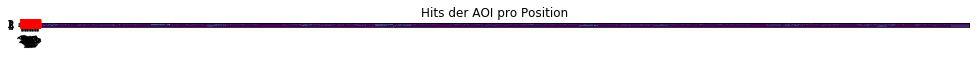

In [59]:
positions = [1,2,3,4,5]
aois = range(1, 26)

print(post_aoi_df)

harvest = np.nan_to_num(post_aoi_df.values)

fig, ax = plt.subplots()
im = ax.imshow(harvest)

# We want to show all ticks...
ax.set_xticks(np.arange(len(aois)))
ax.set_yticks(np.arange(len(positions)))

# ... and label them with the respective list entries

ax.set_xticklabels(aois)
ax.set_yticklabels(positions)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for num in [0,1,2,3,4]:
    for j in aois:
        text = ax.text(j, num, str(int(harvest[num][j])), ha="center", va="center", color="r")

ax.set_title("Hits der AOI pro Position")
# Add colorbar, make sure to specify tick locations to match desired ticklabels
#cbar = fig.colorbar(im, ticks=[-1, 0, 14])
#cbar.ax.set_yticklabels(['< -1', '0', '> 14']) 

plt.show()

**Ergebnis:** WAS IST DAS Ergebnis.

<a id="cell6"></a>
# Frage 6: Verteilung der Hits auf die Clients

**Ziel:** WAS IST DAS ZIEL.

Text(0.5, 1.0, 'Nutzer')

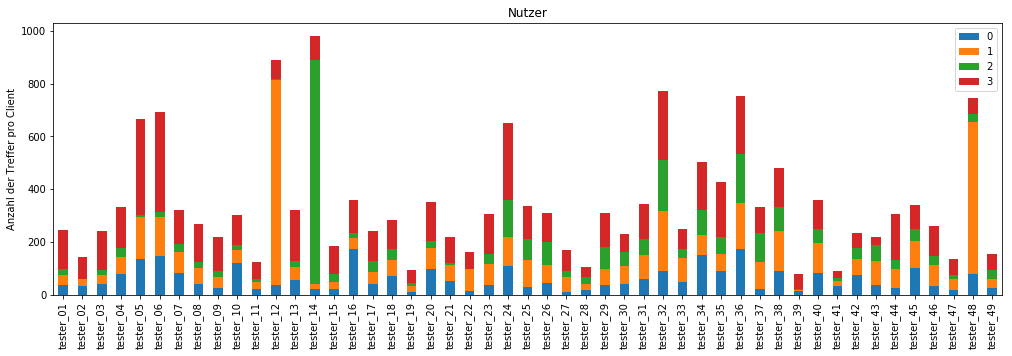

In [60]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

df=pd.DataFrame(client_data).transpose()
df.plot(kind='bar', stacked=True)

plt.ylabel('Anzahl der Treffer pro Client')
plt.title('Nutzer')

**Ergebnis:** WAS IST DAS Ergebnis.

Text(0.5, 1.0, 'Clients')

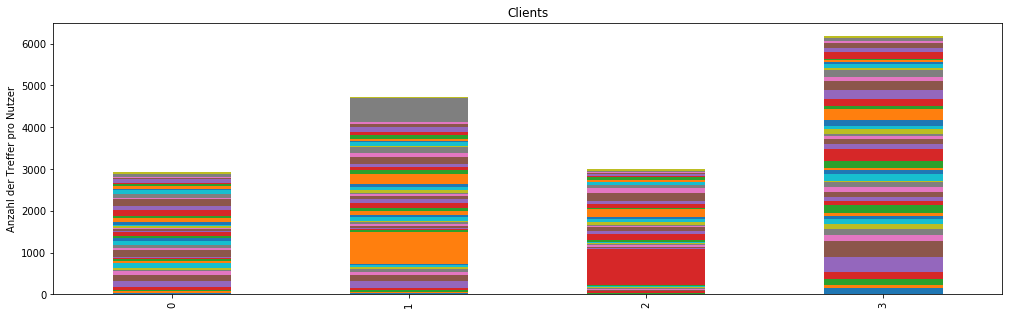

In [64]:
plt.rcParams["figure.figsize"] = (17, 5) # (w, h)

df=pd.DataFrame(client_data)
df.plot(kind='bar', stacked=True, legend=False)

plt.ylabel('Anzahl der Treffer pro Nutzer')
plt.title('Clients')